In [41]:
import tensorflow as tf
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt

In [42]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
    #creating a callback function that activates if the accuracy is greater than 60%
        if(logs.get('accuracy')>0.99):
            print("\nim maxed out baby, too goated!")
            self.model.stop_training = True

In [43]:
path = "mnist.npz"

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

callbacks = myCallback()
x_train = x_train / 255.0
x_train = x_train.reshape(60000, 28, 28, 1)

x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test / 255.0

In [44]:
model = tf.keras.models.Sequential([
    #convolution part
    # creates a convolution layer with 64 filters with 3 by 3 dimensions
    # sets activation function to relu, with drops all negative values 
    # sets input shape to 28 by 28 array, same as before, 1 denotes that the image is gray-scale, only 1 color channel
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    
    # create a max pooling layer with a 2 by 2 pooling filter
    # means that the largest pixel value with be chosen out of every 4 pixels
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # insert another set of convolutions and pooling so that the network can learn another set of convolutions
    # then pooling layer is added so that the images can get smaller again
    # this reduces number of dense layers needed
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    
    #deep neural network part
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary() #generates summary of parameters so we can see images journey throughout the network

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#the model is much slower now when compiling
#this is because there are 64 filters that are getting passed on each image multiple times, so the computation is much heavier
#but our accuracy is much better now, hitting 99.7% on the first epoch
model.fit(x_test, y_test, epochs=10, callbacks=[callbacks])

Epoch 1/10
313/313 [==============================] - 16s 51ms/step - loss: 0.3163 - accuracy: 0.90601s -
Epoch 2/10
313/313 [==============================] - 14s 45ms/step - loss: 0.0832 - accuracy: 0.9739
Epoch 3/10
313/313 [==============================] - 16s 52ms/step - loss: 0.0485 - accuracy: 0.9839
Epoch 4/10
312/313 [============================>.] - ETA: 0s - loss: 0.0261 - accuracy: 0.9907 ETA: 0s - loss: 0.0258 - accu
im maxed out baby, too goated!
313/313 [==============================] - 14s 45ms/step - loss: 0.0261 - accuracy: 0.9907


In [47]:
print(y_test[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


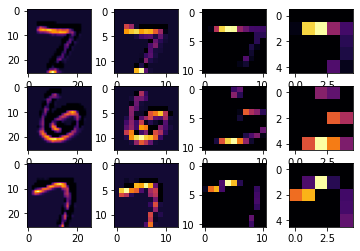

In [64]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0 #0th element is 7
SECOND_IMAGE=7 #7th element is 9
THIRD_IMAGE=26 #26th element is 7
CONVOLUTION_NUMBER = 63 #represents filter number, our convolution layers have 64 filters

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

#looking at effect that the convolution has on our model
for x in range(4):
    f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    
    f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    
    f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)